In [2]:
%load_ext autoreload
%autoreload 2

from model import BaseModel
from dataset import MolerDataset, MolerData
from utils import pprint_pyg_obj
from torch_geometric.loader import DataLoader
import torch
from model_utils import get_params



dataset = MolerDataset(
    root = '/data/ongh0068', 
    raw_moler_trace_dataset_parent_folder = '/data/ongh0068/guacamol/trace_dir',
    output_pyg_trace_dataset_parent_folder = '/data/ongh0068/l1000/already_batched',
    split = 'valid_0',
)

loader = DataLoader(dataset, batch_size=1, shuffle=False, follow_batch = [
    'correct_edge_choices',
    'correct_edge_types',
    'valid_edge_choices',
    'valid_attachment_point_choices',
    'correct_attachment_point_choice',
    'correct_node_type_choices',
    'original_graph_x',
    'correct_first_node_type_choices'
])


for batch in loader:
#     batch.cuda()
    break

2023-01-09 12:57:59.886853: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
params = get_params(dataset)
model = BaseModel(params, dataset)#.cuda()

In [9]:
batch.correct_node_type_choices_batch.unique()

tensor([  0,   2,   4,   6,   8,  10,  11,  13,  15,  18,  20,  22,  24,  26,
         28,  30,  32,  34,  36,  38,  39,  41,  44,  47,  49,  50,  52,  54,
         56,  58,  60,  62,  64,  67,  70,  73,  75,  77,  79,  81,  84,  87,
         89,  90,  93,  95,  98, 100, 102, 104, 107, 109, 110, 113, 115, 117,
        119, 121, 123, 125, 127, 128, 130, 133, 135, 138, 139, 141, 143, 145,
        147, 149, 151, 153, 155, 157, 159, 161, 163, 166, 170, 173, 174, 177,
        179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 204, 206,
        208, 210, 214, 217, 219, 221, 223, 225, 226, 228, 230, 232, 234, 236,
        238, 240, 242, 244, 246, 247, 249, 251, 253, 255, 257, 259, 262, 264,
        266, 268, 270, 273, 274, 276, 279, 281, 283, 285, 287, 289, 291, 293,
        295, 297, 299, 301, 303, 305, 307, 309, 312, 315, 316, 318, 320, 322,
        324, 326, 328, 331, 333, 335, 337, 340, 342, 344, 346, 348, 350, 352,
        354, 355, 357, 359, 361, 363, 365, 368, 370, 371, 373, 3

In [21]:
model.step(batch)


kld_loss tensor(99.7405, grad_fn=<MeanBackward0>)


RuntimeError: BaseModel is not attached to a `Trainer`.

In [5]:
model.step(batch)

log_var tensor(66.5463, grad_fn=<MaxBackward1>)
kld_loss tensor(4.0854e+25, grad_fn=<MeanBackward1>)


RuntimeError: BaseModel is not attached to a `Trainer`.

In [6]:
# model.parameters()

# for name, param in model.parameters():
#     if param.requires_grad:
#         print (name)

<generator object Module.parameters at 0x7f93e676ccf0>

In [3]:
ckpt_file_path = '/data/ongh0068/l1000/2023-01-08_07_51_26.751380/epoch=14-val_loss=6.56.ckpt'
# '/data/ongh0068/l1000/2023-01-08_07_51_26.751380/epoch=05-val_loss=6.62.ckpt'
# '/data/ongh0068/l1000/2023-01-08_07_51_26.751380/epoch=02-val_loss=7.12.ckpt'
# '/data/ongh0068/l1000/2023-01-07_07_24_40.584868/epoch=15-val_loss=7.52.ckpt'
#'/data/ongh0068/l1000/2023-01-07_14_31_37.584989/epoch=00-val_loss=10.90.ckpt'
# '/data/ongh0068/l1000/2023-01-06_16_41_53.821231/epoch=00-val_loss=10.60.ckpt'
# '/data/ongh0068/l1000/FYP-DrugDiscoveryWithDeepLearning/lightning_logs/version_10/checkpoints/epoch=47-step=888960.ckpt'
# '/data/ongh0068/l1000/2023-01-06_12_10_45.376222/epoch=00-val_f1=0.00.ckpt'
# '/data/ongh0068/l1000/FYP-DrugDiscoveryWithDeepLearning/lightning_logs/version_10/checkpoints/epoch=47-step=888960.ckpt'
# '/data/ongh0068/l1000/FYP-DrugDiscoveryWithDeepLearning/lightning_logs/version_8/checkpoints/epoch=99-step=245600.ckpt'

model = BaseModel.load_from_checkpoint(ckpt_file_path, params = params, dataset = dataset)

In [4]:
model.eval()

BaseModel(
  (_full_graph_encoder): GraphEncoder(
    (_embed): Embedding(166, 64)
    (_model): GenericGraphEncoder(
      (_first_layer): GCNConv(123, 64)
      (_encoder_layers): ModuleList(
        (0): Sequential(
          (0): LayerNorm(64, mode=graph)
          (1): LeakyReLU(negative_slope=0.01)
          (2): GCNConv(64, 64)
        )
        (1): Sequential(
          (0): LayerNorm(64, mode=graph)
          (1): LeakyReLU(negative_slope=0.01)
          (2): GCNConv(64, 64)
        )
        (2): Sequential(
          (0): LayerNorm(64, mode=graph)
          (1): LeakyReLU(negative_slope=0.01)
          (2): GCNConv(64, 64)
        )
        (3): Sequential(
          (0): LayerNorm(64, mode=graph)
          (1): LeakyReLU(negative_slope=0.01)
          (2): GCNConv(64, 64)
        )
        (4): Sequential(
          (0): LayerNorm(64, mode=graph)
          (1): LeakyReLU(negative_slope=0.01)
          (2): GCNConv(64, 64)
        )
        (5): Sequential(
          (0): L

In [9]:
with torch.no_grad():
    input_molecule_representations = model._full_graph_encoder(
        original_graph_node_categorical_features=batch.original_graph_node_categorical_features,
        node_features=batch.original_graph_x.float(),
        edge_index=batch.original_graph_edge_index,
        edge_features=batch.original_graph_edge_features.float(),
        batch_index=batch.original_graph_x_batch,
    )


#     partial_graph_representions, node_representations = model._partial_graph_encoder(
#         partial_graph_node_categorical_features = batch.partial_node_categorical_features,
#         node_features = batch.x,
#         edge_index = batch.edge_index.long(), 
#         edge_features = batch.partial_graph_edge_features.float(), 
#         graph_to_focus_node_map = batch.focus_node,
#         candidate_attachment_points = batch.valid_attachment_point_choices,
#         batch_index = batch.batch
#     )
    # Apply latent sampling strategy
    p, q, latent_representations = model.sample_from_latent_repr(
        input_molecule_representations
    )

In [5]:
z = torch.randn(1000, 512)

In [6]:
%load_ext autoreload
%autoreload 2
decoder_states = model.decode(latent_representations = z, max_num_steps = 1200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


RDKit runtime error on base molecule, with message:
unsupported operand type(s) for -: '_vectSt6vectorIiSaIiEE' and '_vectSt6vectorIiSaIiEE'
RDKit runtime error on base molecule, with message:
unsupported operand type(s) for -: '_vectSt6vectorIiSaIiEE' and '_vectSt6vectorIiSaIiEE'
RDKit runtime error on base molecule, with message:
unsupported operand type(s) for -: '_vectSt6vectorIiSaIiEE' and '_vectSt6vectorIiSaIiEE'
RDKit runtime error on base molecule, with message:
unsupported operand type(s) for -: '_vectSt6vectorIiSaIiEE' and '_vectSt6vectorIiSaIiEE'
RDKit runtime error on base molecule, with message:
unsupported operand type(s) for -: '_vectSt6vectorIiSaIiEE' and '_vectSt6vectorIiSaIiEE'
RDKit runtime error on base molecule, with message:
unsupported operand type(s) for -: '_vectSt6vectorIiSaIiEE' and '_vectSt6vectorIiSaIiEE'
RDKit runtime error on base molecule, with message:
unsupported operand type(s) for -: '_vectSt6vectorIiSaIiEE' and '_vectSt6vectorIiSaIiEE'
RDKit runtime

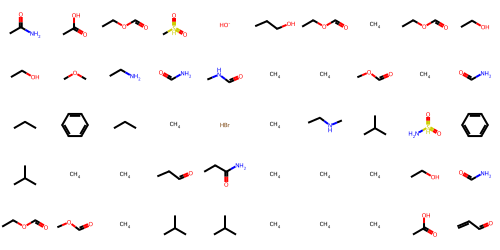

In [8]:
from rdkit.Chem import Draw

Draw.MolsToGridImage([decoder_states[i].molecule for i in range(len(decoder_states))], subImgSize=(50,50), maxMols = 50, molsPerRow=10)

/data/ongh0068/anaconda3/envs/l1000/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


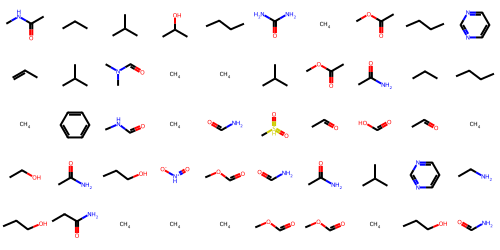

In [6]:
from rdkit.Chem import Draw

Draw.MolsToGridImage([decoder_states[i].molecule for i in range(len(decoder_states))], subImgSize=(50,50), maxMols = 50, molsPerRow=10)

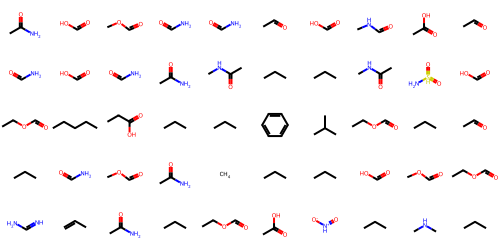

In [12]:
from rdkit.Chem import Draw

Draw.MolsToGridImage([decoder_states[i].molecule for i in range(len(decoder_states))], subImgSize=(50,50), maxMols = 50, molsPerRow=10)

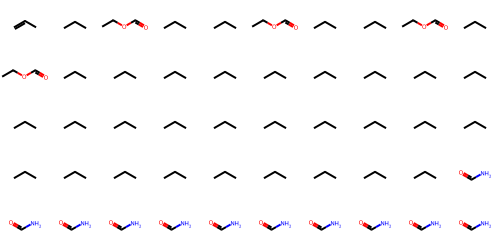

In [11]:
from rdkit.Chem import Draw
Draw.MolsToGridImage([decoder_states[i].molecule for i in range(len(decoder_states))], subImgSize=(50,50), maxMols = 50, molsPerRow=10)

In [1]:
from rdkit.Chem import Draw
Draw.MolsToGridImage([decoder_states[i].molecule for i in range(len(decoder_states))], subImgSize=(50,50), maxMols = 50, molsPerRow=10)

NameError: name 'decoder_states' is not defined

In [21]:
from rdkit.Chem import Draw
img= Draw.MolsToGridImage([decoder_states[i].molecule for i in range(len(decoder_states))], subImgSize=(100,100))

In [32]:
from rdkit.Chem import Draw
img = Draw.MolsToGridImage([decoder_states[i].molecule for i in range(len(decoder_states))], subImgSize=(50,50), maxMols = 50, molsPerRow=10)

In [33]:
with open("img1.png", "wb") as png:
    png.write(img.data)

In [37]:
dir(img)

['_ACCEPTABLE_EMBEDDINGS',
 '_FMT_GIF',
 '_FMT_JPEG',
 '_FMT_PNG',
 '_MIMETYPES',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_data',
 '_data_and_metadata',
 '_find_ext',
 '_mimetype',
 '_read_flags',
 '_repr_html_',
 '_repr_jpeg_',
 '_repr_mimebundle_',
 '_repr_png_',
 '_retina_shape',
 '_show_mem_addr',
 'alt',
 'data',
 'embed',
 'filename',
 'format',
 'height',
 'metadata',
 'reload',
 'retina',
 'unconfined',
 'url',
 'width']

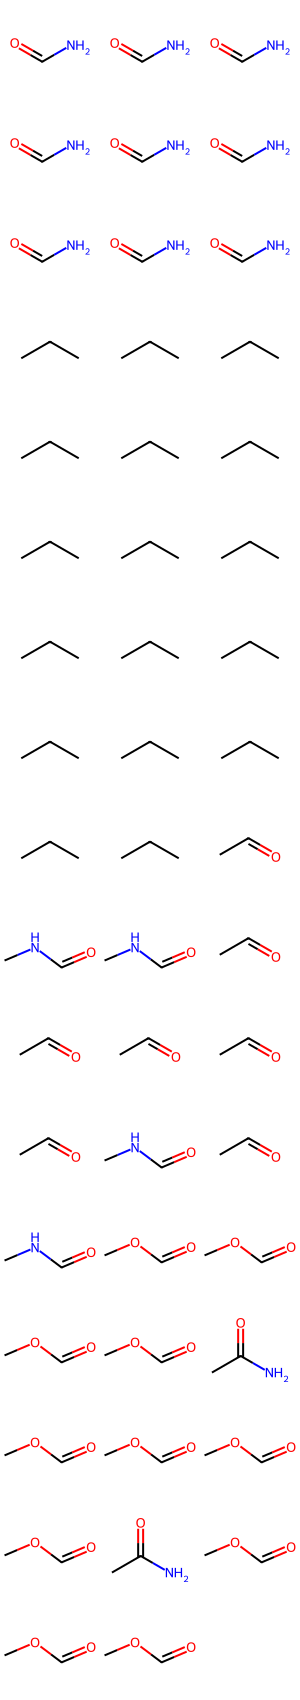

In [111]:
Draw.MolsToGridImage([decoder_states[i].molecule for i in range(len(decoder_states)) if i > 100], subImgSize=(100,100))

In [108]:
from rdkit import Chem
[Chem.MolToSmiles(decoder_states[i].molecule) for i in range(len(decoder_states))]

['C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CCCC',
 'CNC(C)=O',
 'CNC(C)=O',
 'CNC(C)=O',
 'CNC(C)=O',
 'CNC(C)=O',
 'CNC(C)=O',
 'CNC(C)=O',
 'CNC(C)=O',
 'CNC(C)=O',
 'CNC(C)=O',
 'CNC(C)=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'CCO',
 'NC=O',
 'NC=O',
 'NC=O',
 'CCO',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'CCO',
 'NC=O',
 'CCO',
 'NC=O',
 'CCO',
 'NC=O',
 'CCO',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'CCO',
 'CCO',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'NC=O',
 'CCC',

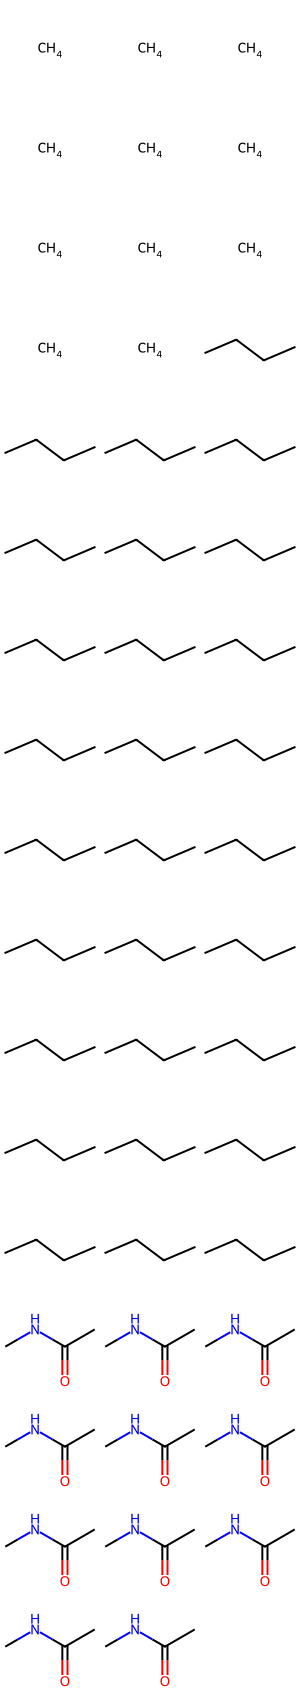

In [105]:
img

In [50]:
import torch
from torch_geometric.data import Data

edge_index2 = torch.tensor([[],[]], dtype=torch.long)
x2 = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x2, edge_index=edge_index2)

In [87]:
data

Data(x=[3, 1], edge_index=[2, 0])

In [55]:
from torch_geometric.nn import GCNConv
layer = GCNConv(1, 1, add_self_loops = True)
layer(data.x, data.edge_index)

tensor([[ 1.5546],
        [ 0.0000],
        [-1.5546]], grad_fn=<AddBackward0>)

In [8]:
from rdkit.Chem import Draw
Draw.MolsToGridImage([decoder_states[i].molecule for i in range(len(decoder_states))], subImgSize=(1000,1000))

NameError: name 'decoder_states' is not defined

In [29]:
from rdkit import Chem
Chem.MolToSmiles(decoder_states[1].molecule)

'CCC(=O)O.CCCC(=O)NC1(CC#N)C23CC4=NN5C(=O)C67C8=C9OC%10C%11=C%12CC(=O)OS(=O)(=O)C1%13OC1C%14CNCC1%15C%13=C(CC(=O)O)N1C%13%16OC(=O)C(C)C%17%18ON=C%19OC(=O)C(OC(=O)CC)(OC(=O)CCC%20(CCOC(=C(CC(=O)O)N(CCC2O4)C3)C%20)C%17(C(=O)O)S%10(=O)=O)C62ON=C3C%12C(=O)N4OC(=O)C6CC%11%13C9C6(COC6CCCOC6)NC(CC(=O)O)=NCCOC69C%10CC%11(CN6C5(C)C(=O)O)C56OC%12%13C5(C(=O)N5C(=C=NOC5(C)C(=O)O2)C(=O)OS(=O)(=O)C(CN2CCCC2)C(=O)O%10)C1(OC(=O)CC)C%12(C4(C(=O)O%19)C%11%16%13)C61C(N)(CO)OC(=O)C1(C%15%18)C81OC(OC(=O)C(C)=C(C)CC(=O)NCCC#N)C(=C(COC(=O)CC)C(=O)O)C1C1(C2CN(C(=C=NO)C(C2=C(C)C(=O)O)C%149N(C)CC)C12CCNCC2)N37.NCCO'